In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
train_images.shape


(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

In [12]:
train_labels.shape

(60000,)

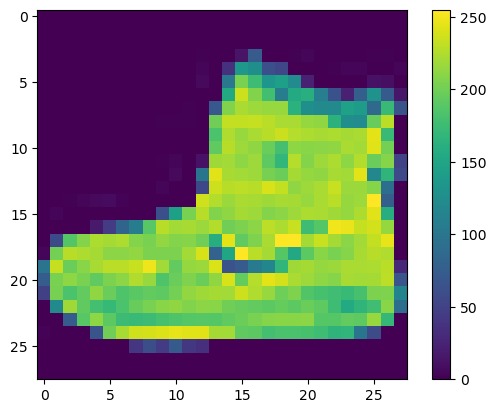

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

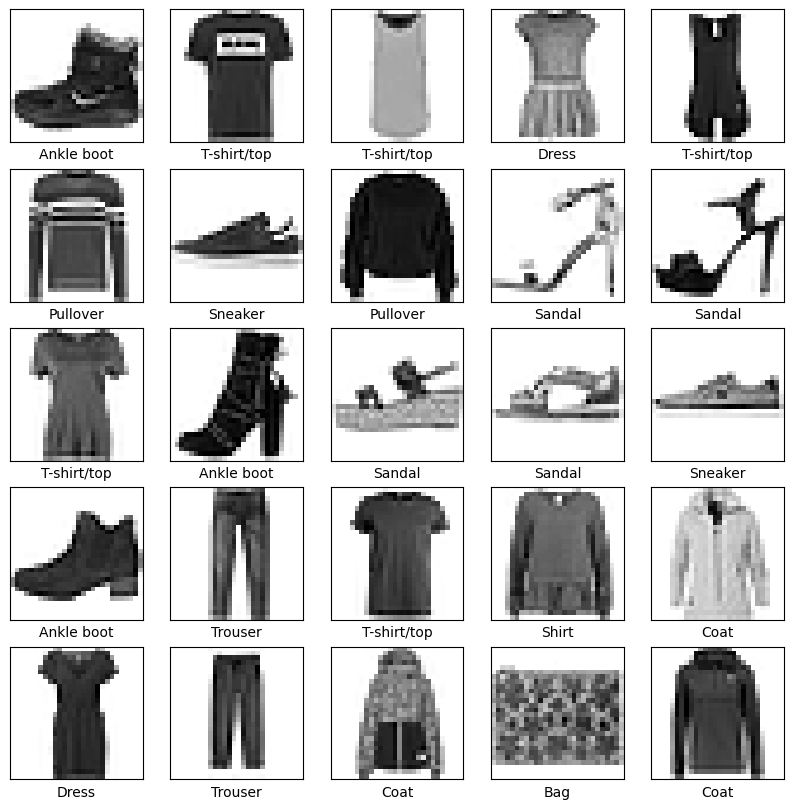

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

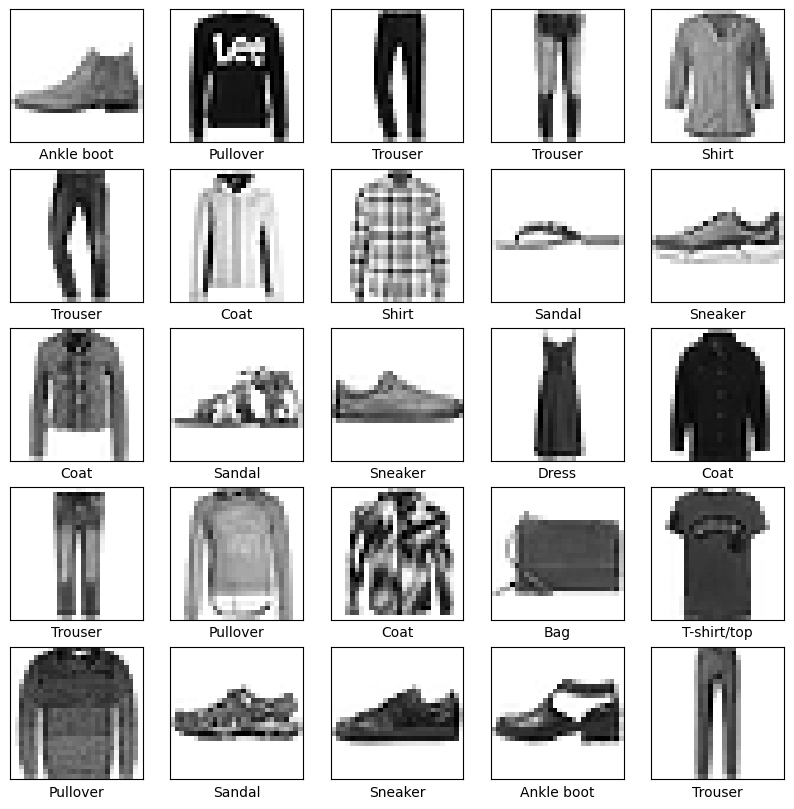

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5054 - accuracy: 0.8223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8902


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3657 - accuracy: 0.8709
Test accuracy: 0.8708999752998352


In [21]:
predictions = model.predict(test_images)


313/313 [==============================] - 0s 903us/step


In [22]:
predictions

array([[1.32720652e-05, 6.41236468e-08, 1.36133713e-06, ...,
        8.18265080e-02, 3.11661324e-06, 9.08728302e-01],
       [3.28426972e-06, 2.03567607e-10, 9.97925520e-01, ...,
        2.59691810e-15, 2.84724696e-12, 1.11933995e-13],
       [2.40620693e-06, 9.99995232e-01, 3.99783318e-08, ...,
        1.57773884e-15, 1.72917014e-10, 1.21434221e-13],
       ...,
       [2.74297839e-04, 5.25583577e-09, 4.47622733e-05, ...,
        2.48782453e-05, 9.97843146e-01, 3.84076593e-09],
       [1.55622899e-06, 9.99815285e-01, 2.80691182e-07, ...,
        8.77716031e-13, 1.41545609e-09, 3.73881637e-09],
       [2.46288371e-04, 8.92613934e-06, 7.46620295e-04, ...,
        3.49837616e-02, 1.02486752e-03, 1.88209451e-04]], dtype=float32)

In [23]:
predictions[0]


array([1.3272065e-05, 6.4123647e-08, 1.3613371e-06, 4.5373358e-08,
       2.4010828e-06, 9.3977172e-03, 2.7134463e-05, 8.1826508e-02,
       3.1166132e-06, 9.0872830e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])


9

In [25]:
test_labels[0]


9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


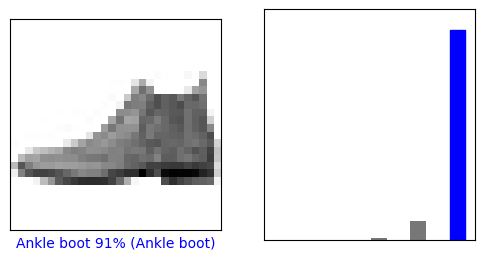

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


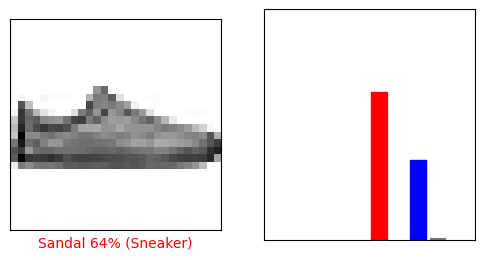

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

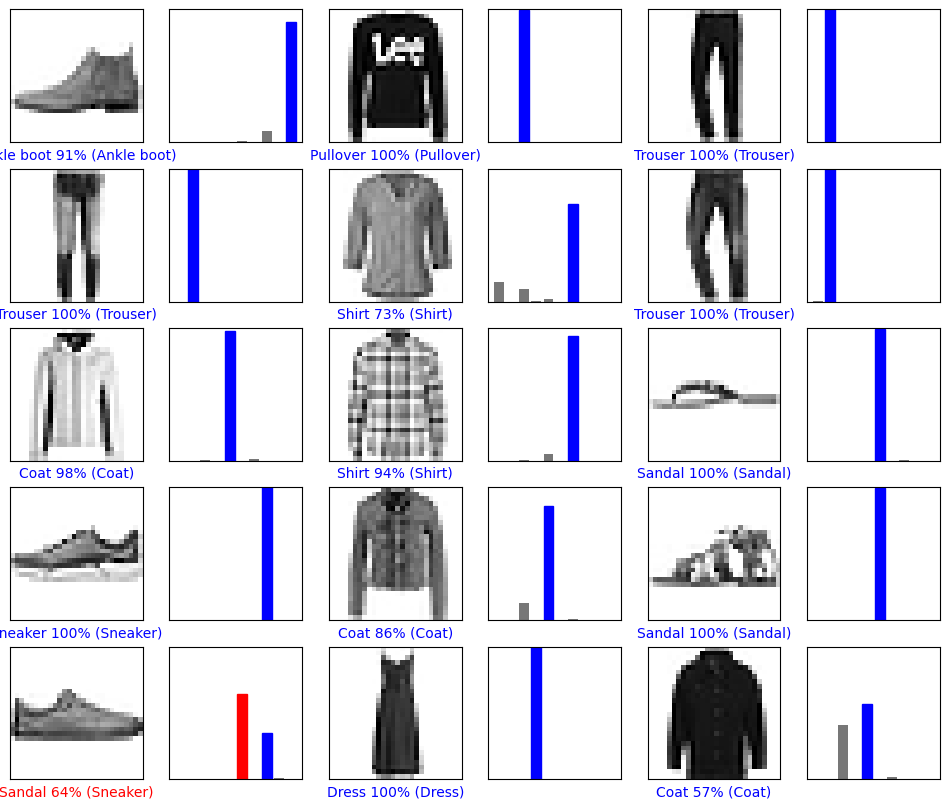

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[1.3272089e-05 6.4123881e-08 1.3613409e-06 4.5373522e-08 2.4010826e-06
  9.3977153e-03 2.7134487e-05 8.1826575e-02 3.1166157e-06 9.0872818e-01]]


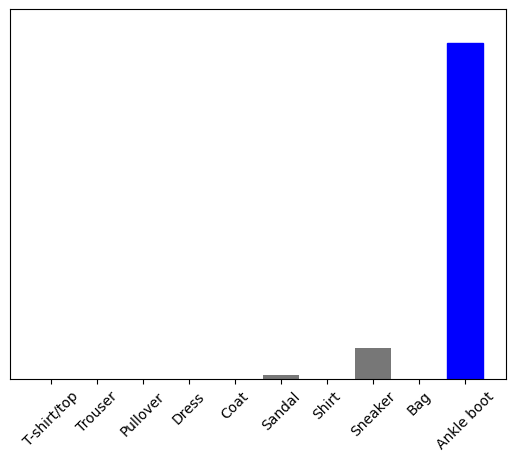

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])


9